# 🧮 Product Rule in Action: Pollutant Load in Stormwater Runoff

## 🌧️ Real-World Context

In municipal stormwater management, one key metric is **pollutant load** — the total amount of a contaminant transported by runoff over time. This is often modeled as:



$$
L(t) = Q(t) * C(t)
$$


Where:
- `L(t)` = pollutant load (mg/s or kg/day)
- `Q(t)` = flow rate (e.g., cubic feet per second, cfs)
- `C(t)` = concentration of the pollutant in the water (e.g., mg/L)

Both `Q(t)` and `C(t)` typically vary over time during a storm event, so we must use the **product rule** to compute how pollutant load changes.

---

## 💧 Scenario: Modeling a Storm Event

You’re working for the City of Rivendale on a stormwater quality model. During a typical storm event:

- Flow rate increases over time as more runoff enters the system
- Pollutant concentration decreases over time as initial high concentrations are diluted

The engineers provide these simplified models:



- Q(t) = 3t,   What does this mean?  A: *Flow increases linearly (cfs)*
- C(t) = 10 - 0.2t,  What does this mean?  A: *Concentration decreases over time (mg/L)*


---

## ✏️ Math Setup

Given:



$$
L(t) = Q(t) * C(t)
$$
$$
=> 3t * (10 - 0.2t)
$$


Apply the **product rule**:

If `L(t) = f(t) * g(t)`, then:



$$
L'(t) = f'(t) * g(t) + f(t) * g'(t)
$$


In this case:

- `f(t) = Q(t) = 3t`,  so `f'(t) = 3`
- `g(t) = C(t) = 10 - 0.2t`,  so `g'(t) = -0.2`

---

## 🐍 Python Implementation Prompt

Use `SymPy` to:

1. Define symbolic functions for `Q(t)` and `C(t)`
2. Compute `L(t)` and its derivative `L'(t)`
3. Plot both `L(t)` and `L'(t)` over the interval `t ∈ [0, 20]`

```python
import sympy as sp

t = sp.Symbol('t')
Q = 3 * t
C = 10 - 0.2 * t
L = Q * C
L_prime = sp.diff(L, t)

# Optional: convert to numerical function for plotting
L_func = sp.lambdify(t, L, 'numpy')
L_prime_func = sp.lambdify(t, L_prime, 'numpy')


In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [5]:
t = sp.Symbol('t')
Q = 3 * t
C = 10 - 0.2 * t
L = Q * C
L_prime = sp.diff(L, t)

print(f"L_prime: ", L_prime)

L_prime:  30 - 1.2*t


## So, What does this mean??

### Real World Interpretation
- At early times (small t) L_prime(t) is positive → pollutant loading is increasing.
- As t increases, the concentration drops due to dilution (runoff becoming cleaner), even as flow rate might still be rising.
- Eventually, L(t) = 0, → maximum loading is reached.
- Once maximum loading is reached, L(t) < 0, → pollutant loading begins to decrease, because dilution (declining concentration) outweighs increasing flow.


In [3]:
# Convert to a numerical function for plotting

L_func = sp.lambdify(t, L, 'numpy')
L_prime_func = sp.lambdify(t, L_prime, 'numpy')

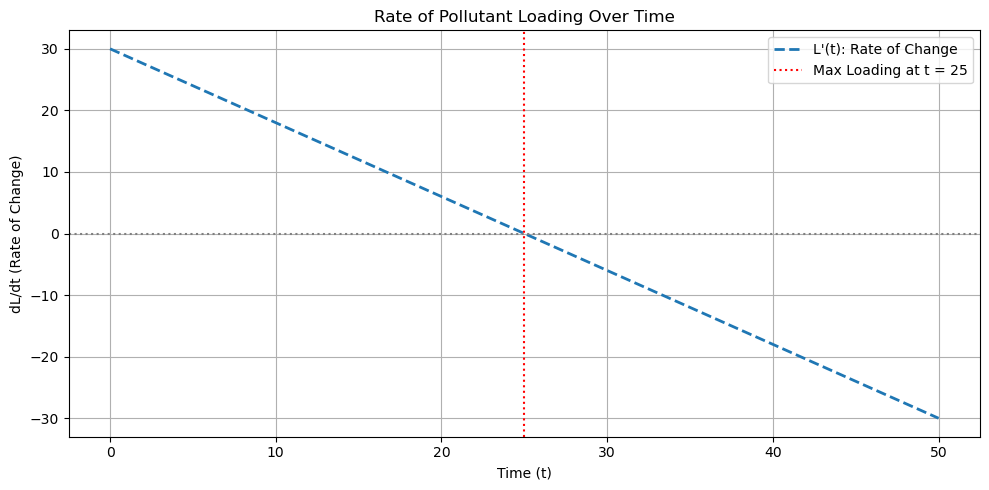

In [6]:
# Create a range of time values
# Create a range of time values
t_vals = np.linspace(0, 50, 200)  # from 0 to 50 minutes (or whatever time unit)

# Evaluate functions
L_vals = L_func(t_vals)
L_prime_vals = L_prime_func(t_vals)

# Plotting L'(t)
plt.figure(figsize=(10, 5))
plt.plot(t_vals, L_prime_vals, label="L'(t): Rate of Change", linestyle='--', linewidth=2)
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(25, color='red', linestyle=':', label='Max Loading at t = 25')
plt.title("Rate of Pollutant Loading Over Time")
plt.xlabel("Time (t)")
plt.ylabel("dL/dt (Rate of Change)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Did you notice something is off in the graph?

If not, look again, what would you expect?  Remember, this is the concentration of stormwater pollutant with respect to time from the beginning of the storm event to the end.

The Loading should not be linear.  The parameters used to describe the loading assumed a very simplistic linear model, which is not realisting.  This was meant to show one the product rule, but two the importance of using accurate models or data when developing mathematical models.

So, lets use a realistic model now:

In [8]:
# Define our terms
t = sp.Symbol('t')

Q = 3 * t
# Better: exponential decay for concentration
C = 10 * sp.exp(-0.1 * t)
L = Q * C

L_prime = sp.diff(L, t)

print(f"L_prime = ", L_prime)



L_prime =  -3.0*t*exp(-0.1*t) + 30*exp(-0.1*t)


In [9]:
# Convert to numerical functions
L_func = sp.lambdify(t, L, 'numpy')
L_prime_func = sp.lambdify(t, L_prime, 'numpy')

# Time values
t_vals = np.linspace(0, 60, 200)

# Evaluate
L_vals = L_func(t_vals)
L_prime_vals = L_prime_func(t_vals)



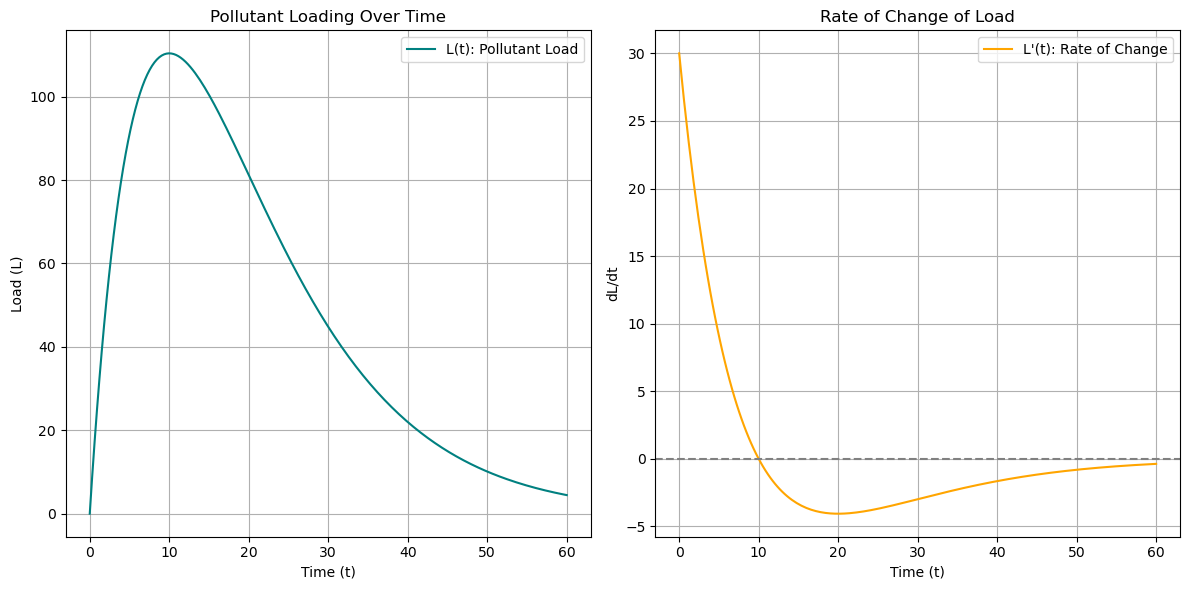

In [10]:
# Plot L and L'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_vals, L_vals, label="L(t): Pollutant Load", color='teal')
plt.title("Pollutant Loading Over Time")
plt.xlabel("Time (t)")
plt.ylabel("Load (L)")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_vals, L_prime_vals, label="L'(t): Rate of Change", color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Rate of Change of Load")
plt.xlabel("Time (t)")
plt.ylabel("dL/dt")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()